In [1]:
import ccxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
phemex = ccxt.phemex({
    'enableRateLimit': True,
    'apiKey': Private,
    'secret': Private
})

In [3]:
symbol = "BTCUSD"
timeframe = '1d'
limit = 5000

bars = phemex.fetch_ohlcv(symbol, timeframe = timeframe, limit = limit)
df_crypto = pd.DataFrame(bars, columns = ['timestamp' , 'open', 'high', 'low', 'close', 'volume'])
df_crypto['timestamp'] = pd.to_datetime(df_crypto['timestamp'], unit='ms')
df_crypto.set_index(df_crypto['timestamp'], inplace = True)
df_crypto.drop('timestamp', axis = 1, inplace = True )

In [4]:
ticker = "^GSPC"

start_date = "2022-04-18"
end_date = "2025-01-11"

df_stock = yf.download(ticker, start=start_date, end=end_date, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [5]:
df_stock['Log_Return'] = np.log(df_stock['Open'] / df_stock['Close'].shift(1)) 
df_crypto['Log_Return'] = np.log(df_crypto['close'] / df_crypto['close'].shift(2)) #df_crypto['Log_Return'] = np.log(df_crypto['close'] / df_crypto['close'].shift(1)

In [6]:
return_df = pd.DataFrame(columns = ['S&P 500 daily log return' , 'BTCUSD daily log return'] )

In [7]:
return_df['BTCUSD daily log return'] = df_crypto['Log_Return']
return_df['S&P 500 daily log return'] = df_stock['Log_Return']
return_df = return_df[3:]
nan_mask = return_df["S&P 500 daily log return"].isna()
return_df['S&P 500 close days'] = nan_mask

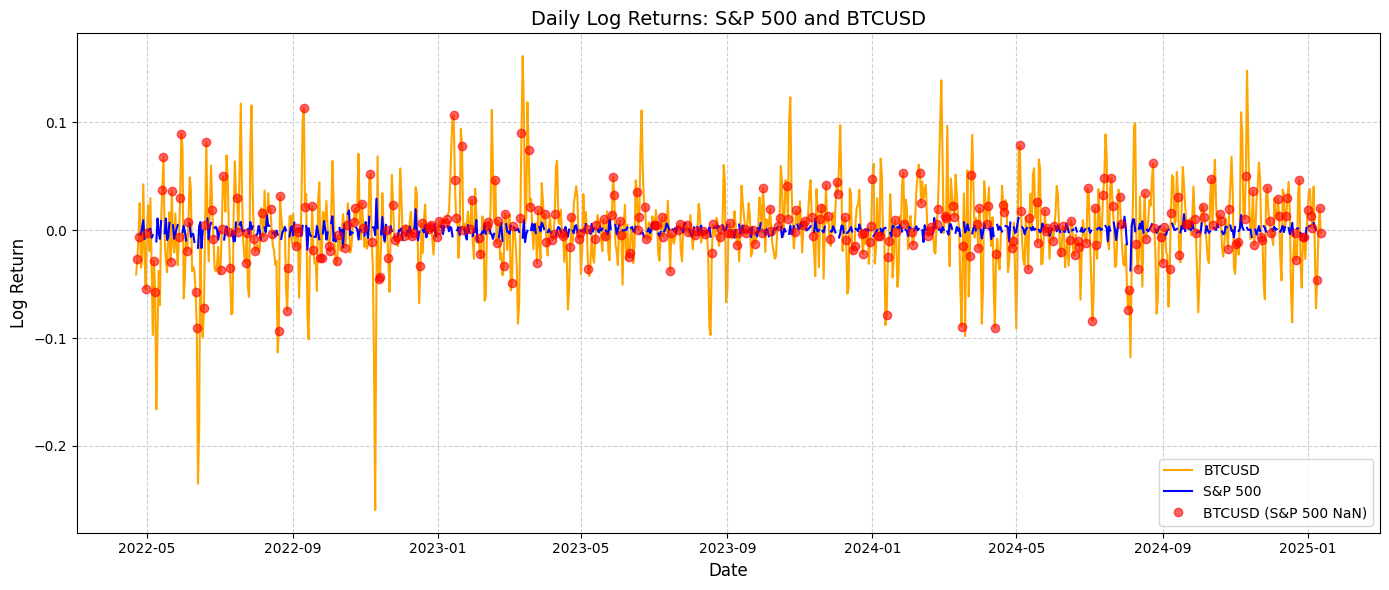

In [8]:
sp500_col = "S&P 500 daily log return"
btc_col = "BTCUSD daily log return"

fig, ax = plt.subplots(figsize=(14, 6)) 

ax.plot(return_df.index, return_df[btc_col], label="BTCUSD", color="orange", linewidth=1.5, zorder=1)
ax.plot(return_df.index, return_df[sp500_col], label="S&P 500", color="blue", linewidth=1.5, zorder=2)

nan_mask = return_df[sp500_col].isna()
if nan_mask.any():
    ax.plot(return_df.index[nan_mask], return_df[btc_col][nan_mask], 'o', color='red', label='BTCUSD (S&P 500 NaN)', alpha=0.6)


ax.set_title("Daily Log Returns: S&P 500 and BTCUSD", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Log Return", fontsize=12)
ax.legend(fontsize=10)


ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

In [9]:
return_df['S&P 500 daily log return Shift up'] = return_df['S&P 500 daily log return'].shift(-1)

In [10]:
cleaned_df = return_df.dropna(subset=["S&P 500 daily log return Shift up"])
cleaned_df = cleaned_df[cleaned_df["S&P 500 close days"] != False]

cleaned_df = cleaned_df.iloc[1:]
cleaned_df = cleaned_df.drop(['S&P 500 daily log return' , 'S&P 500 close days'] , axis = 1)
cleaned_df

,BTCUSD daily log return,S&P 500 daily log return Shift up
timestamp,,
2022-05-01,-0.002713,-0.000320
2022-05-08,-0.057091,-0.010255
2022-05-15,0.068129,-0.002705
2022-05-22,0.036426,0.004618
2022-05-30,0.089583,-0.001721
...,...,...
2024-12-25,0.046564,-0.002498
2024-12-29,-0.006472,-0.008438
2025-01-01,0.019038,0.003671


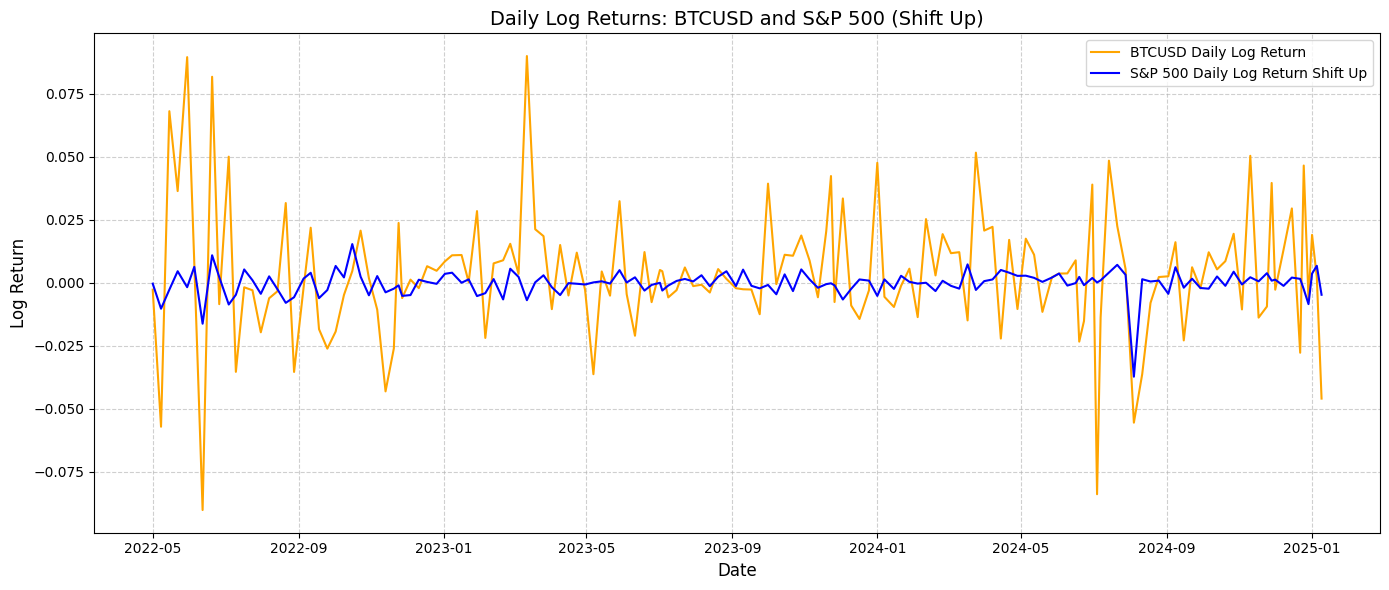

In [11]:
import matplotlib.pyplot as plt

btc_col = "BTCUSD daily log return"
sp500_col = "S&P 500 daily log return Shift up"

fig, ax = plt.subplots(figsize=(14, 6))  # Stretch horizontally with figsize

ax.plot(cleaned_df.index, cleaned_df[btc_col], label="BTCUSD Daily Log Return", color="orange", linewidth=1.5)
ax.plot(cleaned_df.index, cleaned_df[sp500_col], label="S&P 500 Daily Log Return Shift Up", color="blue", linewidth=1.5)

ax.set_title("Daily Log Returns: BTCUSD and S&P 500", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Log Return", fontsize=12)
ax.legend(fontsize=10)

ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

In [12]:
np.corrcoef(cleaned_df["BTCUSD daily log return"], cleaned_df["S&P 500 daily log return Shift up"])

array([[1.        , 0.25545379],
       [0.25545379, 1.        ]])

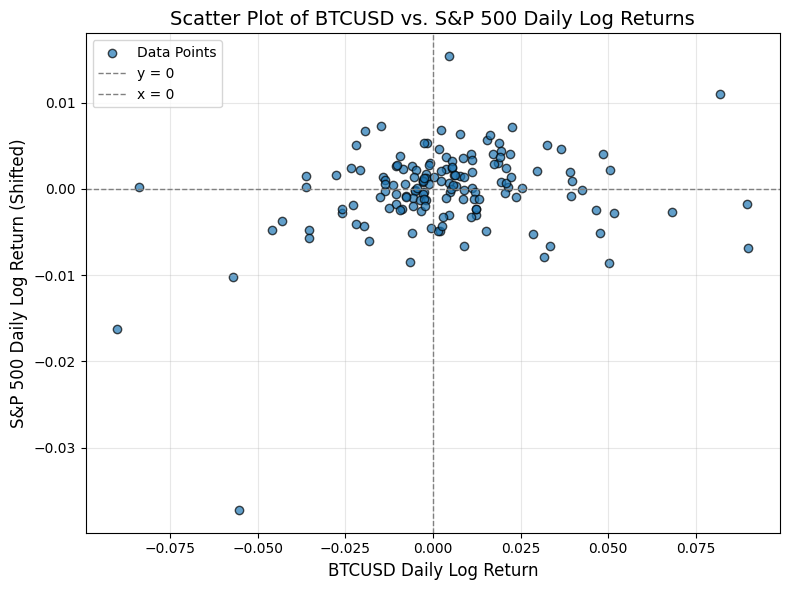

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df["BTCUSD daily log return"], cleaned_df["S&P 500 daily log return Shift up"], 
            alpha=0.7, edgecolor='k', label="Data Points")

# Add x=0 and y=0 dotted lines
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label="y = 0")
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label="x = 0")

# Add labels, title, and legend
plt.title("Scatter Plot of BTCUSD vs. S&P 500 Daily Log Returns", fontsize=14)
plt.xlabel("BTCUSD Daily Log Return", fontsize=12)
plt.ylabel("S&P 500 Daily Log Return (Shifted)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

In [14]:
btc_col = "BTCUSD daily log return"
sp500_col = "S&P 500 daily log return Shift up"

valid_data = cleaned_df[[btc_col, sp500_col]].dropna()

btc_sign = valid_data[btc_col] > 0
sp500_sign = valid_data[sp500_col] > 0

positive_positive = ((btc_sign) & (sp500_sign)).sum()
negative_negative = ((~btc_sign) & (~sp500_sign)).sum()

total_cases = len(valid_data)

positive_positive_percentage = (positive_positive / total_cases) * 100
negative_negative_percentage = (negative_negative / total_cases) * 100

print(f"Percentage of cases where both are positive: {positive_positive_percentage:.2f}%")
print(f"Percentage of cases where both are negative: {negative_negative_percentage:.2f}%")

Percentage of cases where both are positive: 32.67%
Percentage of cases where both are negative: 24.00%


In [15]:
cleaned_df

,BTCUSD daily log return,S&P 500 daily log return Shift up
timestamp,,
2022-05-01,-0.002713,-0.000320
2022-05-08,-0.057091,-0.010255
2022-05-15,0.068129,-0.002705
2022-05-22,0.036426,0.004618
2022-05-30,0.089583,-0.001721
...,...,...
2024-12-25,0.046564,-0.002498
2024-12-29,-0.006472,-0.008438
2025-01-01,0.019038,0.003671
